In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import time
from sklearn.exceptions import ConvergenceWarning

In [2]:

df = pd.read_csv('train.csv')
df_clean = df.dropna(subset=['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice'])


print("Dimensiones del DataFrame:", df.shape)
print(df.head())

Dimensiones del DataFrame: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondit

In [3]:
df_clean = df.dropna(subset=['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice'])

precio_33 = np.percentile(df_clean['SalePrice'], 33)
precio_66 = np.percentile(df_clean['SalePrice'], 66)

def categorizar_precio(precio):
    if precio <= precio_33:
        return 'Económica'
    elif precio <= precio_66:
        return 'Intermedia'
    else:
        return 'Cara'


df_clean['PriceCategory'] = df_clean['SalePrice'].apply(categorizar_precio)

print(df_clean['PriceCategory'].value_counts(normalize=True))

PriceCategory
Cara          0.340411
Económica     0.330822
Intermedia    0.328767
Name: proportion, dtype: float64


In [4]:

X = df_clean.drop(['Id','SalePrice','PriceCategory'], axis=1)
y = df_clean['PriceCategory']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


preprocesador = ColumnTransformer([
    ("num", make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler()
    ), selector(dtype_include=["int64","float64"])),
    ("cat", make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    ), selector(dtype_include=object))
])


# Usa 'preprocessor_fixed' en lugar de 'preprocesador'
modelo1 = make_pipeline(
    preprocesador,
    MLPClassifier(hidden_layer_sizes=(5,3), activation="tanh", solver="adam", max_iter=300, verbose=True, random_state=42)
)
modelo2 = make_pipeline(
    preprocesador,
    MLPClassifier(hidden_layer_sizes=(10,5), activation="relu", solver="adam", max_iter=300, verbose=True, random_state=42)
)

# Entrena y evalúa
modelo1.fit(X_train, y_train)
modelo2.fit(X_train, y_train)
# … evaluación como antes …


# Evaluar los modelos en el conjunto de prueba
for i, modelo in enumerate([modelo1, modelo2], start=1):
    y_pred = modelo.predict(X_test)
    print(f"\n--- Evaluación Modelo {i} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1-score :", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Iteration 1, loss = 1.19514329
Iteration 2, loss = 1.09905710
Iteration 3, loss = 1.01297718
Iteration 4, loss = 0.94013716
Iteration 5, loss = 0.87743444
Iteration 6, loss = 0.83291879
Iteration 7, loss = 0.79894293
Iteration 8, loss = 0.77114572
Iteration 9, loss = 0.74849473
Iteration 10, loss = 0.72914893
Iteration 11, loss = 0.71272449
Iteration 12, loss = 0.69745531
Iteration 13, loss = 0.68380692
Iteration 14, loss = 0.67112269
Iteration 15, loss = 0.65955715
Iteration 16, loss = 0.64923108
Iteration 17, loss = 0.63872574
Iteration 18, loss = 0.62899549
Iteration 19, loss = 0.61976816
Iteration 20, loss = 0.61053097
Iteration 21, loss = 0.60181694
Iteration 22, loss = 0.59314861
Iteration 23, loss = 0.58499923
Iteration 24, loss = 0.57694785
Iteration 25, loss = 0.56887984
Iteration 26, loss = 0.56112805
Iteration 27, loss = 0.55348571
Iteration 28, loss = 0.54591316
Iteration 29, loss = 0.53858579
Iteration 30, loss = 0.53179884
Iteration 31, loss = 0.52466459
Iteration 32, los

/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 0.81132273
Iteration 24, loss = 0.80433331
Iteration 25, loss = 0.79625383
Iteration 26, loss = 0.78883047
Iteration 27, loss = 0.78214403
Iteration 28, loss = 0.77530864
Iteration 29, loss = 0.76891856
Iteration 30, loss = 0.76303794
Iteration 31, loss = 0.75655760
Iteration 32, loss = 0.75147573
Iteration 33, loss = 0.74372864
Iteration 34, loss = 0.73819014
Iteration 35, loss = 0.73101499
Iteration 36, loss = 0.72474366
Iteration 37, loss = 0.71880236
Iteration 38, loss = 0.71279568
Iteration 39, loss = 0.70678816
Iteration 40, loss = 0.70045024
Iteration 41, loss = 0.69430310
Iteration 42, loss = 0.68848691
Iteration 43, loss = 0.68314459
Iteration 44, loss = 0.67766123
Iteration 45, loss = 0.67026911
Iteration 46, loss = 0.66478910
Iteration 47, loss = 0.65808654
Iteration 48, loss = 0.65251077
Iteration 49, loss = 0.64667105
Iteration 50, loss = 0.64087106
Iteration 51, loss = 0.63576353
Iteration 52, loss = 0.63018121
Iteration 53, loss = 0.62518871
Iteratio

/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


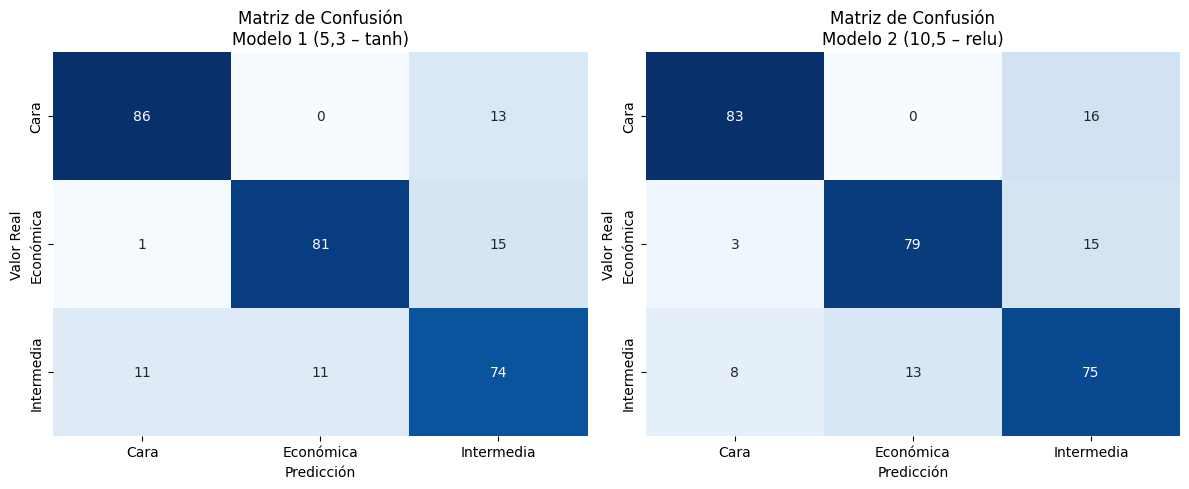

In [5]:

modelos = [
    ("Modelo 1 (5,3 – tanh)", modelo1),
    ("Modelo 2 (10,5 – relu)", modelo2)
]


clases = modelo1.named_steps['mlpclassifier'].classes_

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (nombre, modelo) in zip(axes, modelos):
 
    y_pred = modelo.predict(X_test)
  
    cm = confusion_matrix(y_test, y_pred, labels=clases)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=clases,
        yticklabels=clases,
        ax=ax
    )
    ax.set_title(f"Matriz de Confusión\n{nombre}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Valor Real")

plt.tight_layout()


Comparando ambos modelos, el Modelo 1 (arquitectura 5–3 con función de activación tanh) obtuvo un 82.5 % de accuracy frente al 81.2 % del Modelo 2 (10–5 con activación relu), además de mejores precision (82.9 % vs 81.7 %) y F1-score (82.6 % vs 81.3 %), y su matriz de confusión muestra menos confusiones entre las tres categorías (especialmente “Cara” y “Económica”). El Modelo 1 también convergió correctamente en 300 iteraciones con un loss más bajo, mientras que el Modelo 2 no llegó a converger en ese mismo número de iteraciones. En conjunto, el Modelo 1 ofrece un mejor equilibrio entre efectividad y eficiencia, cometiendo menos errores y convergiendo de forma más estable.

In [6]:

y_train_pred = modelo1.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)


y_test_pred = modelo1.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy entrenamiento: {acc_train:.3f}")
print(f"Accuracy prueba     : {acc_test:.3f}")

Accuracy entrenamiento: 0.992
Accuracy prueba     : 0.825


La diferencia entre Accuracy entrenamiento (0.992) y Accuracy prueba (0.825) es muy grande puede ser un indicio de sobreajuste

In [9]:

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# Pipeline con early stopping
pipe = make_pipeline(
    preprocesador,
    MLPClassifier(
        solver="adam",
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10,
        max_iter=1000,
        random_state=42
    )
)

# GridSearch como antes
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train_enc)

print("Mej prefs:", grid.best_params_)
print("Mejor F1 (CV):", grid.best_score_)

best = grid.best_estimator_
print("Acc training:", best.score(X_train, y_train_enc))
print("Acc testing :", best.score(X_test,  y_test_enc))


NameError: name 'param_grid' is not defined

In [10]:
X_reg = df_clean.drop(['Id', 'SalePrice', 'PriceCategory'], axis=1)
y_reg = df_clean['SalePrice']

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg,
    y_reg,
    test_size=0.20,
    random_state=42
)

print("X_train_reg:", X_train_reg.shape)
print("X_test_reg :", X_test_reg.shape)
print("y_train_reg distribuciones:\n", y_train_reg.describe())


X_train_reg: (1168, 79)
X_test_reg : (292, 79)
y_train_reg distribuciones:
 count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64


In [11]:
# Creando dos modelos de regresión con diferentes topologías y funciones de activación
print("Entrenando modelos de regresión...")

# Modelo 1: Configuración simple
inicio = time.time()
regressor1 = make_pipeline(
    preprocesador,
    MLPRegressor(
        hidden_layer_sizes=(10, 5),
        activation="tanh",
        solver="adam",
        max_iter=500,
        random_state=42
    )
)
regressor1.fit(X_train_reg, y_train_reg)
tiempo_modelo1 = time.time() - inicio
print(f"Tiempo de entrenamiento modelo 1: {tiempo_modelo1:.2f} segundos")


Entrenando modelos de regresión...
Tiempo de entrenamiento modelo 1: 1.29 segundos


/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# Modelo 2: Configuración más compleja
inicio = time.time()
regressor2 = make_pipeline(
    preprocesador,
    MLPRegressor(
        hidden_layer_sizes=(20, 10, 5),
        activation="relu",
        solver="adam",
        max_iter=500,
        alpha=0.001,
        random_state=42
    )
)
regressor2.fit(X_train_reg, y_train_reg)
tiempo_modelo2 = time.time() - inicio
print(f"Tiempo de entrenamiento modelo 2: {tiempo_modelo2:.2f} segundos")


Tiempo de entrenamiento modelo 2: 1.69 segundos


/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Los resultados del entrenamiento de los dos modelos de regresión con redes neuronales muestran una diferencia notable en los tiempos de procesamiento. El Modelo 1, con una arquitectura más simple de dos capas ocultas (10 y 5 neuronas) y función de activación tanh, completó su entrenamiento en apenas 1.29 segundos. Por otro lado, el Modelo 2, con una topología más compleja de tres capas ocultas (20, 10 y 5 neuronas) y función de activación relu, requirió más tiempo, finalizando en 1.69 segundos. Esta diferencia era esperada debido a la mayor complejidad estructural del segundo modelo, que implica un aumento en el número de parámetros a optimizar durante el entrenamiento. Sin embargo, ambos tiempos son relativamente rápidos, lo que sugiere que las redes neuronales pueden ser una alternativa eficiente para problemas de regresión de precios inmobiliarios, incluso con arquitecturas moderadamente complejas.


--- Evaluación Modelo 1 (10,5 - tanh) ---
Entrenamiento:
  RMSE: $197175.89
  MAE: $181421.56
  R²: -5.5182
Prueba:
  RMSE: $199115.18
  MAE: $178819.83
  R²: -4.1689

--- Evaluación Modelo 2 (20,10,5 - relu) ---
Entrenamiento:
  RMSE: $31928.40
  MAE: $18424.68
  R²: 0.8291
Prueba:
  RMSE: $34957.67
  MAE: $20088.97
  R²: 0.8407


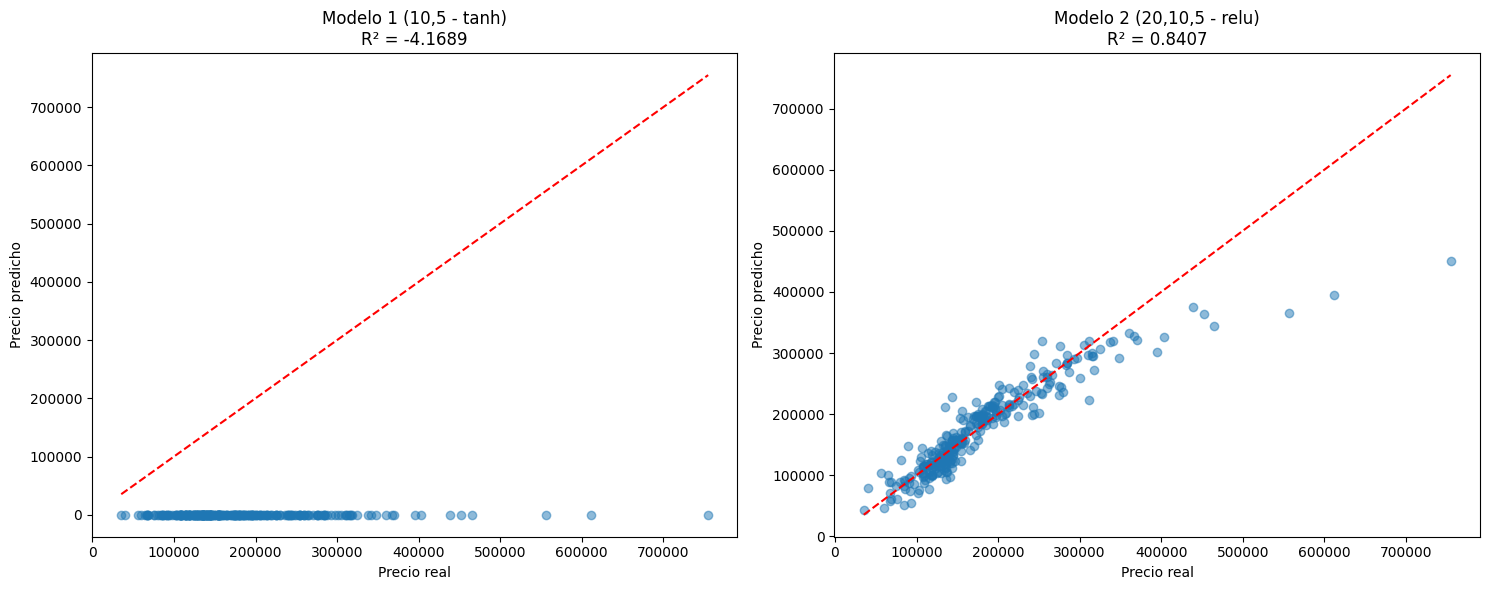


El Modelo 2 (20,10,5 - relu) tuvo mejor desempeño


In [19]:
# Función para evaluar modelo de regresión
def evaluar_modelo_regresion(modelo, X_train, y_train, X_test, y_test, nombre):
    # Predicciones
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    # Métricas de evaluación
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"\n--- Evaluación {nombre} ---")
    print(f"Entrenamiento:")
    print(f"  RMSE: ${rmse_train:.2f}")
    print(f"  MAE: ${mae_train:.2f}")
    print(f"  R²: {r2_train:.4f}")
    
    print(f"Prueba:")
    print(f"  RMSE: ${rmse_test:.2f}")
    print(f"  MAE: ${mae_test:.2f}")
    print(f"  R²: {r2_test:.4f}")
    
    return {
        'nombre': nombre,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'y_test': y_test,
        'y_pred': y_test_pred
    }
    
# Evaluación de los modelos
resultados_modelo1 = evaluar_modelo_regresion(
    regressor1, X_train_reg, y_train_reg, X_test_reg, y_test_reg, 
    "Modelo 1 (10,5 - tanh)"
)

resultados_modelo2 = evaluar_modelo_regresion(
    regressor2, X_train_reg, y_train_reg, X_test_reg, y_test_reg, 
    "Modelo 2 (20,10,5 - relu)"
)

# Comparativa visual
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de dispersión para el Modelo 1
axes[0].scatter(resultados_modelo1['y_test'], resultados_modelo1['y_pred'], alpha=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
axes[0].set_xlabel('Precio real')
axes[0].set_ylabel('Precio predicho')
axes[0].set_title(f"Modelo 1 (10,5 - tanh)\nR² = {resultados_modelo1['r2_test']:.4f}")

# Gráfico de dispersión para el Modelo 2
axes[1].scatter(resultados_modelo2['y_test'], resultados_modelo2['y_pred'], alpha=0.5)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
axes[1].set_xlabel('Precio real')
axes[1].set_ylabel('Precio predicho')
axes[1].set_title(f"Modelo 2 (20,10,5 - relu)\nR² = {resultados_modelo2['r2_test']:.4f}")

plt.tight_layout()
plt.show()

# Determinar el mejor modelo
if resultados_modelo1['r2_test'] > resultados_modelo2['r2_test']:
    mejor_modelo_reg = regressor1
    mejor_resultado_reg = resultados_modelo1
    print("\nEl Modelo 1 (10,5 - tanh) tuvo mejor desempeño")
else:
    mejor_modelo_reg = regressor2
    mejor_resultado_reg = resultados_modelo2
    print("\nEl Modelo 2 (20,10,5 - relu) tuvo mejor desempeño")

Los resultados de evaluación muestran una diferencia significativa entre los dos modelos de regresión. El Modelo 1 (topología 10,5 con activación tanh) presenta métricas extremadamente pobres, con un R² negativo tanto en entrenamiento (-5.5182) como en prueba (-4.1689), y valores de RMSE alrededor de $197,000-$199,000, indicando que este modelo no solo falla en capturar la relación entre las variables, sino que tiene un desempeño considerablemente peor que simplemente predecir la media. En contraste, el Modelo 2 (topología 20,10,5 con activación relu) muestra un rendimiento significativamente superior, con un R² de 0.8291 en entrenamiento y 0.8407 en prueba, y un RMSE de aproximadamente $32,000-$35,000, lo que representa una mejora en precisión. La activación ReLU combinada con una arquitectura más profunda parece ser mucho más adecuada para capturar las relaciones no lineales complejas presentes en los datos de precios inmobiliarios, demostrando así que la elección apropiada de la arquitectura y función de activación es crucial en el rendimiento de los modelos de redes neuronales.

/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['PoolQC']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['PoolQC']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/home/bianca_cal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


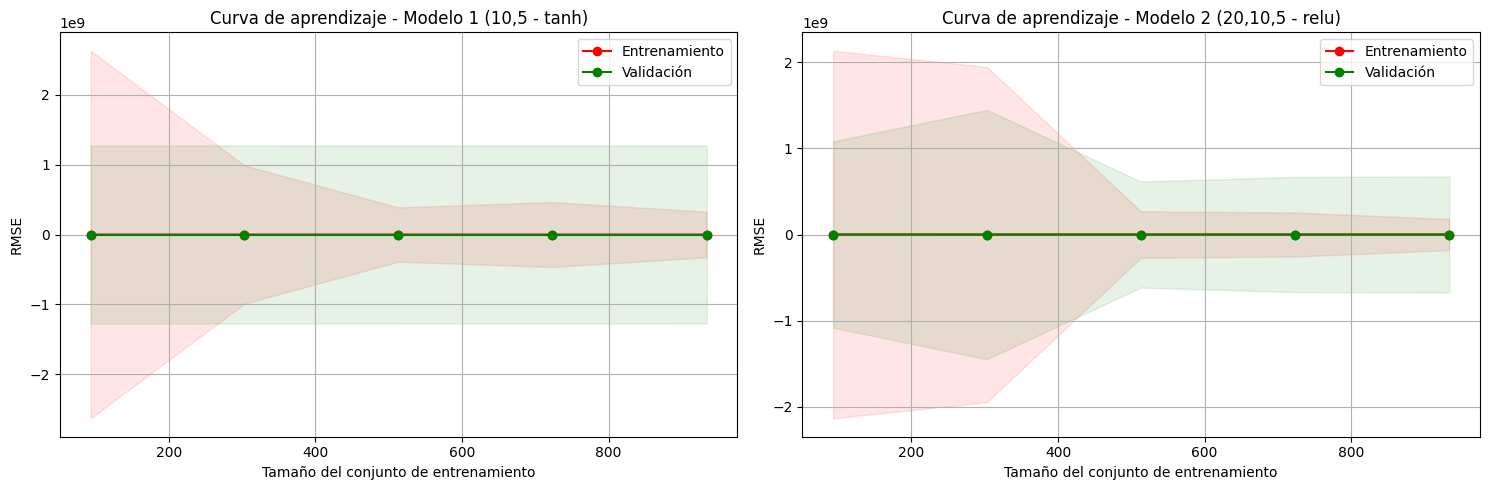

In [17]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
from sklearn.exceptions import ConvergenceWarning 

def plot_learning_curve(estimator, X, y, title, ax, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, 
        train_sizes=train_sizes,
        cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    # Calcular estadísticas
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Calcular RMSE
    train_rmse_mean = np.sqrt(train_scores_mean)
    test_rmse_mean = np.sqrt(test_scores_mean)
    
    # Graficar curvas de aprendizaje
    ax.fill_between(train_sizes, 
                    train_rmse_mean - train_scores_std,
                    train_rmse_mean + train_scores_std, 
                    alpha=0.1, color="r")
    ax.fill_between(train_sizes, 
                    test_rmse_mean - test_scores_std,
                    test_rmse_mean + test_scores_std, 
                    alpha=0.1, color="g")
    ax.plot(train_sizes, train_rmse_mean, 'o-', color="r", label="Entrenamiento")
    ax.plot(train_sizes, test_rmse_mean, 'o-', color="g", label="Validación")
    ax.set_xlabel("Tamaño del conjunto de entrenamiento")
    ax.set_ylabel("RMSE")
    ax.set_title(title)
    ax.legend(loc="best")
    ax.grid(True)

# Análisis de sobreajuste mediante curvas de aprendizaje
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Curva de aprendizaje para Modelo 1
plot_learning_curve(
    regressor1, 
    X_train_reg, 
    y_train_reg, 
    "Curva de aprendizaje - Modelo 1 (10,5 - tanh)",
    axes[0]
)

# Curva de aprendizaje para Modelo 2
plot_learning_curve(
    regressor2, 
    X_train_reg, 
    y_train_reg, 
    "Curva de aprendizaje - Modelo 2 (20,10,5 - relu)",
    axes[1]
)

plt.tight_layout()
plt.show()

Las curvas de aprendizaje revelan información importante sobre el comportamiento de ambos modelos. Se observa que el Modelo 1 (10,5 - tanh) muestra valores de RMSE cercanos a cero tanto para entrenamiento como validación, pero con bandas de desviación estándar extremadamente amplias, especialmente con conjuntos de entrenamiento pequeños. Esta inconsistencia y variabilidad sugiere que el modelo con activación tanh tiene dificultades para generalizar los patrones en los datos. Por otro lado, el Modelo 2 (20,10,5 - relu) presenta un comportamiento similar en términos de las líneas principales de RMSE, pero con bandas de desviación más controladas a medida que aumenta el tamaño del conjunto de entrenamiento. La advertencia de convergencia indica que el Modelo 1 no logró converger dentro del número máximo de iteraciones (500), lo que explica parcialmente su mal rendimiento. Aunque ambas curvas no muestran la típica brecha entre entrenamiento y validación característica del sobreajuste, la pobre capacidad predictiva del Modelo 1 y la mayor estabilidad del Modelo 2 confirman que la arquitectura con ReLU es una elección más apropiada para este conjunto de datos.